# Explore iGD database and tool 

In [1]:
import cv2
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage import exposure
from skimage.measure import label, regionprops
from skimage.draw import ellipse, ellipse_perimeter
from skimage.measure import EllipseModel, find_contours
from skimage.feature import canny
from skimage.transform import hough_ellipse

In [2]:
#% lsmagic
% pwd    

'/media/john/Rocky/igdplot'

In [3]:
%%bash

for i in 10 100 1000 10000 100000 1000000
do
/usr/bin/time -a -o data1/ucsc_test_i15 -f "%e\t%U\t%S" igd_b15 search /media/john/Rocky/queries/r$i.bed /media/john/Rocky/ucsc_igd_b15/ucsc.igd > /dev/null
done


for i in 10 100 1000 10000 100000 1000000
do
/usr/bin/time -a -o data1/rme_test_i_b15 -f "%e\t%U\t%S" igd_b15 search /media/john/Rocky/queries/r$i.bed /media/john/Rocky/rme_igd_b15/roadmap.igd > /dev/null
done

for i in 10 100 1000 10000 100000 1000000
do
/usr/bin/time -a -o data1/rme_test_i_b12 -f "%e\t%U\t%S" igd_b12 search /media/john/Rocky/queries/r$i.bed /media/john/Rocky/rme_igd_b12/roadmap.igd > /dev/null
done

for i in 10 100 1000 10000 100000 1000000
do
/usr/bin/time -a -o data1/rme_test_i -f "%e\t%U\t%S" igd search /media/john/Rocky/queries/r$i.bed /media/john/Rocky/rme_igd/roadmap.igd > /dev/null
done

for i in 10 100 1000 10000 100000 1000000
do
/usr/bin/time -a -o data1/rme_test_g -f "%e\t%U\t%S" giggle search -q /media/john/Rocky/queries_gz/ucsc_r$i.bed.gz -i /media/john/Rocky/rme_giggle > /dev/null
done

In [ ]:
%%bash

for i in 10 100 1000 10000 100000 1000000
do
/usr/bin/time -a -o data1/rme_test_i -f "%e\t%U\t%S" igd search /media/john/Rocky/queries/r$i.bed /media/john/Rocky/rme_igd/roadmap.igd > /dev/null
done

for i in 10 100 1000 10000 100000 1000000
do
/usr/bin/time -a -o data1/rme_test_g -f "%e\t%U\t%S" giggle search -q /media/john/Rocky/queries_gz/ucsc_r$i.bed.gz -i /media/john/Rocky/rme_giggle > /dev/null
done

for i in 10 100 1000 10000 100000 1000000
do
/usr/bin/time -a -o data1/ucsc_test_i -f "%e\t%U\t%S" igd search /media/john/Rocky/queries/r$i.bed /media/john/Rocky/ucsc_igd/ucsc.igd > /dev/null
done

for i in 10 100 1000 10000 100000 1000000
do
/usr/bin/time -a -o data1/ucsc_test_g -f "%e\t%U\t%S" giggle search -q /media/john/Rocky/queries_gz/ucsc_r$i.bed.gz -i /media/john/Rocky/ucsc_giggle > /dev/null
done

In [44]:
def igdCurves():
    di_rme = pd.read_csv("data1/rme_test_i", sep='\t')    
    di_ucsc  = pd.read_csv("data1/ucsc_test_i", sep='\t')
    dg_rme = pd.read_csv("data1/rme_test_g", sep='\t')
    dg_ucsc  = pd.read_csv("data1/ucsc_test_g", sep='\t') 
    #--------------------------------------------------
    tx = [10, 100, 1000, 10000, 100000, 1000000]
    ti1 = di_rme['real']
    ti2 = di_ucsc['real']
    tg1 = dg_rme['real']
    tg2 = dg_ucsc['real'] 
    cpui1 = di_rme['user'] + di_rme['sys']
    cpui2 = di_ucsc['user'] + di_ucsc['sys']
    cpug1 = dg_rme['user'] + dg_rme['sys']
    cpug2 = dg_ucsc['user'] + dg_ucsc['sys']    
    #------------------------------------------
    f = plt.figure(1, figsize=(12,8))
    ax1 = plt.subplot(221)  
    plt.xlabel('Number of query intervals')
    plt.ylabel('Runtime (s)')    
    plt.yscale('log')
    plt.xscale('log')
    ax1.set_ylim(0.1, 100)
    #plt.title("Roadmap data")   
    plt.plot(tx, ti1, 'm-o', label='iGD')    
    plt.plot(tx, tg1, 'b-o', label='Giggle')
    ax1.legend()
    #------------------------------------------
    ax2 = plt.subplot(222)
    plt.xlabel('Number of query intervals')
    plt.ylabel('Runtime (s)')  
    plt.yscale('log')
    plt.xscale('log')
    ax2.set_ylim(0.1, 11000)
    #plt.title("UCSC data") 
    plt.plot(tx, ti2, 'm-o', label='iGD')    
    plt.plot(tx, tg2, 'b-o', label='Giggle')
    ax2.legend()
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.3)
    plt.show()
    f.savefig('data1/speed_test.pdf')

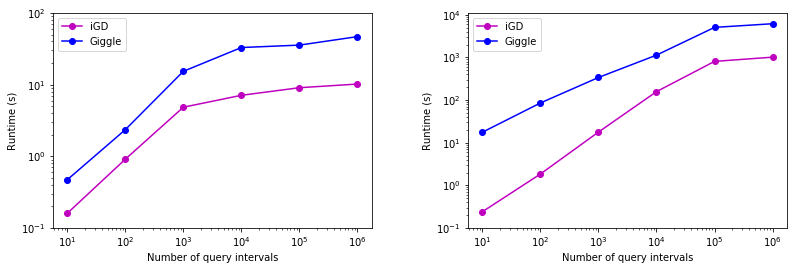

In [45]:
igdCurves()

In [16]:
'''%%bash
for v in 0 400 800
do
igd search /media/john/Rocky/encode_tfbs_t /media/john/Rocky/encode_igd_t/tfbs.igd -v $v
done'''

In [ ]:
def igdMap():    
    # open *.0, *.400, *.800 files in the current folder
    di_ucsc  = pd.read_csv("ucsc_test_i", sep='\t')
    dg_rme = pd.read_csv("rme_test_g", sep='\t')
    dg_ucsc  = pd.read_csv("ucsc_test_g", sep='\t') 
  
    tx = [10, 100, 1000, 10000, 100000, 1000000]
    ti1 = di_rme['real']
    ti2 = di_ucsc['real']
    tg1 = dg_rme['real']
    tg2 = dg_ucsc['real'] 
    #------------------- 
    f = plt.figure(1, figsize=(12,8))
    ax1 = plt.subplot(221)  
    plt.xlabel('Number of query intervals')
    plt.ylabel('Runtime (s)')    
    plt.yscale('log')
    plt.xscale('log')
    #plt.title("Roadmap data")   
    plt.plot(tx, ti1, 'm-o', label='iGD')    
    plt.plot(tx, tg1, 'b-o', label='Giggle')
    ax1.legend()
    
    ax2 = plt.subplot(222)
    plt.xlabel('Number of query intervals')
    plt.ylabel('Runtime (s)')  
    plt.yscale('log')
    plt.xscale('log')
    #plt.title("UCSC data") 
    plt.plot(tx, ti2, 'm-o', label='iGD')    
    plt.plot(tx, tg2, 'b-o', label='Giggle')

    ax2.legend()
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
    plt.show()
    f.savefig('speed_test.pdf')

In [ ]:
    #---------------------------------------------------------------
    img = initializeImg(img)[:,:,0]  
    pred = seg3gaps(pred, img)
    #---------------------------------------------------------------
    fig = plt.figure(figsize=(15,15)) 
    fig.add_subplot(1, 3, 1), plt.imshow(img)   
    fig.add_subplot(1, 3, 2), plt.imshow(labels)
    fig.add_subplot(1, 3, 3), plt.imshow(pred)
    fig = plt.figure()     
    prec = cal_prec(pred, labels)
    print(i, ' prec:', prec)   